# 4. Logistic regression

Next let’s explore linear models, more specifically logistic regression. Unlike the k-NN model, it has internal parameters that need to be optimized.

First, we reimport libraries, arrays and list we are going to use for this section (from previous notebook)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('darkgrid')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from IPython.display import display

In [3]:
class_labels = [0, 1, 2, 3, 4, 5]
class_names = ['bike', 'car', 'motorcycle', 'other', 'truck', 'van'] 
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']

with np.load('train_features.npz') as train_data:
    train_features = train_data['features']
    train_labels = train_data['labels']
    train_images = train_data['images']

X_train = np.array(train_features)
y_train = np.array(train_labels)
images_train = np.array(train_images)


with np.load('valid_features.npz') as valid_data:
    valid_features = valid_data['features']
    valid_labels = valid_data['labels']
    valid_images = valid_data['images']

X_valid = np.array(valid_features)
y_valid = np.array(valid_labels)
images_valid = np.array(valid_images)

with np.load('test_features.npz') as test_data:
    test_features = test_data['features']
    test_labels = test_data['labels']
    test_images = test_data['images']

X_test = np.array(test_features)
y_test = np.array(test_labels)
images_test = np.array(test_images)

## Logistic regression model
Train and evaluate a logistic regression model (without any regularization penalty="none" and without any hyperparameters tuning).

In [4]:
logreg = LogisticRegression(penalty='none')

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Evaluating accuracy of predictions on test set
accuracy = accuracy_score(y_test, y_pred)

print(f'Test accuracy: {accuracy}')

Test accuracy: 0.96


In [5]:
X_train.shape

(280, 1280)

In [6]:
logreg.coef_.shape

(6, 1280)

Coefs array has shape (6, 1280), as they are six classes. Each row of the coefs array corresponds to the coefficients for one of the six classes, and each column corresponds to a feature in X_train

## Model Coefficient

### Heatmap
Get the model coefficients using the coef_ attribute of your estimator and visualize them using a heatmap.

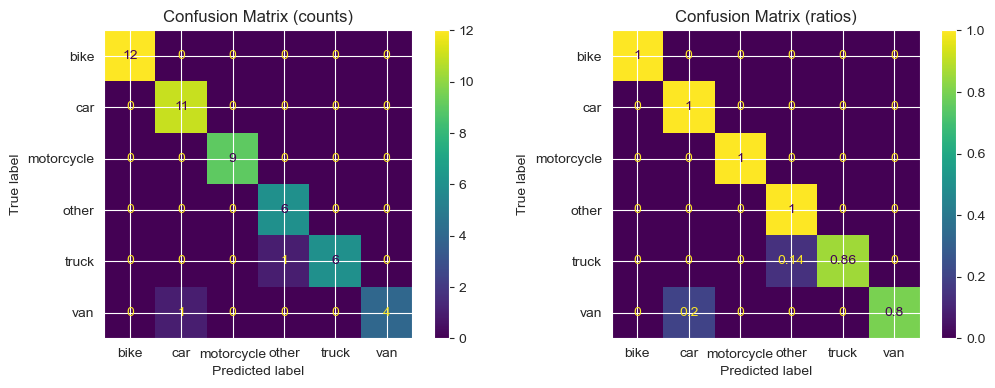

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plots the standard confusion matrix
ax1.set_title("Confusion Matrix (counts)")
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_names, ax=ax1)

# Plots the normalized confusion matrix
ax2.set_title("Confusion Matrix (ratios)")
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, normalize="true", display_labels=class_names, ax=ax2)

plt.show()

We look at misclassified images and their associated probabilities. As in previous section, np.where gets us adresses of misclassified images in test data. We insert in a dataframe the probabilities of each class to plot them as well in the title.

In [8]:
misclassified_indices = np.where(y_test != y_pred)[0]
df_misclassified_proba = pd.DataFrame(data=logreg.predict_proba(X_test[misclassified_indices]), columns=class_names)
df_misclassified_proba

,bike,car,motorcycle,other,truck,van
0,1.350364e-08,1.051665e-08,5.698293e-09,6.827776e-01,3.169479e-01,2.744951e-04
1,1.354269e-16,9.999992e-01,6.560516e-19,4.670742e-17,8.514786e-15,7.678332e-07


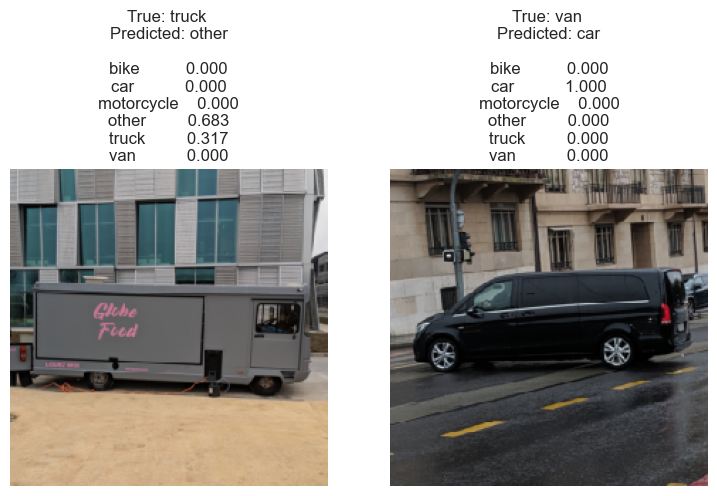

In [9]:
fig, axes = plt.subplots(1, len(misclassified_indices), figsize=(9,9))
axes = axes.flatten()

for index, indice in enumerate(misclassified_indices):
    # Get the true label and predicted label for current image
    true_name = class_names[int(test_labels[indice])]
    predicted_name = class_names[int(y_pred[indice])]

    # Create title
    image_title = f"True: {true_name} \nPredicted: {predicted_name}\n\n"
    confidence_title = df_misclassified_proba.iloc[index].map('{:,.3f}'.format).to_string()

    # Plot image
    axes[index].imshow(test_images[indice])
    axes[index].axis('off')
    axes[index].set_title(image_title + confidence_title )    

plt.show()

### Largest coefficients
What are the largest 5 coefficients for each category (i.e. the indices of these coefficients)?

In [10]:
logreg.coef_.shape

(6, 1280)

As seen before, the coefficients of logistic regression is a six column array so we iterate through each column and get best 

In [11]:
for label in class_labels:
    # Get coefficients and indices for given label
    label_coeffs = logreg.coef_[label]
    top_coeffs = sorted(enumerate(label_coeffs), key=lambda x: abs(x[1]), reverse=True)[:5]
    
    # Print label and top coefficients and indices
    print(f"\nCategory: {class_names[label]}")
    for idx, coeff in top_coeffs:
        formatted_coeff = "{:.3f}".format(coeff)
        print(f"Indice: {idx}, coefficient: {formatted_coeff}")


Category: bike
Indice: 672, coefficient: 0.563
Indice: 801, coefficient: 0.448
Indice: 148, coefficient: 0.445
Indice: 1094, coefficient: 0.416
Indice: 173, coefficient: 0.364

Category: car
Indice: 291, coefficient: 0.627
Indice: 985, coefficient: 0.515
Indice: 861, coefficient: 0.494
Indice: 183, coefficient: 0.455
Indice: 257, coefficient: 0.452

Category: motorcycle
Indice: 1122, coefficient: 0.456
Indice: 898, coefficient: 0.446
Indice: 505, coefficient: 0.404
Indice: 122, coefficient: 0.402
Indice: 165, coefficient: -0.382

Category: other
Indice: 257, coefficient: -0.596
Indice: 734, coefficient: 0.504
Indice: 1061, coefficient: 0.487
Indice: 819, coefficient: -0.481
Indice: 1223, coefficient: 0.433

Category: truck
Indice: 378, coefficient: 0.663
Indice: 580, coefficient: 0.589
Indice: 486, coefficient: 0.542
Indice: 100, coefficient: 0.507
Indice: 1051, coefficient: 0.495

Category: van
Indice: 185, coefficient: 0.558
Indice: 1116, coefficient: 0.501
Indice: 138, coefficient:

### Consistency
Are these results consistent with your observations during the data exploration in the last question of Task 1?

Highest means are present on classes `bike` and `other` with respectively 21.17% and 19.60% of the highest mean values.

What is consistent here is that top coefficient are close to each other. We calculate overall importance over all classes for comparison with other models

In [12]:
logreg.coef_.shape

(6, 1280)

In [13]:
# Get the mean of coefficients across all columns
mean_coeffs = np.mean(np.abs(logreg.coef_), axis=0)
mean_coeffs.shape

(1280,)

In [14]:
# Get indices of top 5 mean coefficients
top_indices = np.argsort(mean_coeffs)[-5:]

for idx in top_indices:
    print(f"Index: {idx}, mean coefficient: {mean_coeffs[idx]:.3f}")

Index: 323, mean coefficient: 0.254
Index: 633, mean coefficient: 0.258
Index: 183, mean coefficient: 0.259
Index: 580, mean coefficient: 0.265
Index: 257, mean coefficient: 0.292


## Regularization
### L2
Set an “l2” regularization and tune the regularization strength parameter of the model with cross-validated grid-search. We test different parameter as this is given in documentation

We select ‘liblinear’ is limited to one-versus-rest schemes and for small datasets, ‘liblinear’ is a good choice as indication in sklearn [doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

We will try with StandardScaler and without rescaling data before applying normalization to coefficients.

In [15]:
# Define a pipeline using StandardScaler and Linear regression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(penalty='l2', multi_class="ovr", solver="liblinear"))
])

param_grid = {
    'log_reg__C': np.logspace(-4, 4, num=50)
}

# Grid search with cross-validation and parallel processing
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to training data
grid.fit(X_train, y_train)

# Print best parameters and corresponding score on training data
print("Best parameters: {}".format(grid.best_params_))
print("Training score: {:.2f}".format(grid.best_score_))

# Evaluate best model on validation data
y_pred = grid.predict(X_valid)
valid_score = accuracy_score(y_valid, y_pred)
print("Validation score: {:.2f}".format(valid_score))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'log_reg__C': 0.0009540954763499944}
Training score: 0.91
Validation score: 0.90


We now try without rescaling data before applying logistic regression

In [16]:
log_reg = LogisticRegression(penalty='l2', multi_class="ovr", solver="liblinear")

param_grid = {
    'C': np.logspace(-4, 4, num=50),
}

grid = GridSearchCV(log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, return_train_score=True)

# Fit to training
grid.fit(X_train, y_train)

# Print best parameters and corresponding score for training
print("Best parameters: {}".format(grid.best_params_))
print("Training score: {:.2f}".format(grid.best_score_))

# Evaluate best model on validation data
y_pred = grid.predict(X_valid)
valid_score = accuracy_score(y_valid, y_pred)
print("Validation score: {:.2f}".format(valid_score))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'C': 0.013257113655901081}
Training score: 0.92
Validation score: 0.91


As validation score is better in case of no rescaling, we will chose this option.

### gs_results Dataframe
Report the result of cross-validated grid-search as a dataframe and interpret the result. In particular, briefly explain what are the mean_train_score, mean_test_score, std_train_score and std_test_score. How are they obtained?
What do they measure?

When we use GridSearchCV, we are evaluating the performance of different combinations of hyperparameters using k-fold cross-validation. Number of folds is set using cv=5. It means training data is split into 5 parts, and the model is trained and evaluated 5 times.

During each fold, one part is used for validation, and rest is used for training. This process is repeated for each fold, so that each part of the data is used for validation once. Final score is the average of scores obtained in each fold.

By using k-fold cross-validation, we reduce risk of overfitting and obtain a more accurate estimate of model's performance. When we set return_train_score to True, we can access the mean_train_score, std_train_score, mean_test_score, and std_test_score for each combination of hyperparameters (otherwise we only get mean_test_score and std_test_score).

Mean_train_score and mean_test_score represent average accuracy on training and validation sets. The standard deviation scores (std_train_score and std_test_score) indicate how much accuracy varies across folds.

These metrics help us to evaluate the performance of the model and compare different hyperparameter combinations. 
* If mean_test_score is high and the std_test_score is low, then the model is performing well on unseen data.
* We also need to check for overfitting by comparing training and validation scores. If training score is much higher than validation, then model may be overfitting.

In [17]:
cv_results = pd.DataFrame(grid.cv_results_)

cv_results["score_diff_test"] = cv_results["mean_test_score"] - cv_results["std_test_score"]

# Print a few interesting columns
columns = [
    "mean_test_score",
    "std_test_score",
    "mean_train_score",
    "std_train_score",
    "param_C",
    "score_diff_test"
]

cv_results[columns].sort_values("mean_test_score", ascending=False).head(15)

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_C,score_diff_test
13,0.921429,0.024223,0.9875,0.001786,0.013257,0.897206
25,0.917857,0.014286,1.0000,0.000000,1.206793,0.903571
21,0.917857,0.014286,1.0000,0.000000,0.26827,0.903571
23,0.917857,0.014286,1.0000,0.000000,0.568987,0.903571
24,0.917857,0.014286,1.0000,0.000000,0.828643,0.903571
26,0.917857,0.014286,1.0000,0.000000,1.757511,0.903571
34,0.917857,0.014286,1.0000,0.000000,35.564803,0.903571
35,0.917857,0.014286,1.0000,0.000000,51.794747,0.903571
38,0.917857,0.014286,1.0000,0.000000,159.985872,0.903571
39,0.917857,0.014286,1.0000,0.000000,232.995181,0.903571


Test score is close for all except first position. For first position problem is that mean minus standard deviation is lower than all other $C$. Which leads me to think that C could be equal to 1

## Plot the training and validation curves
Compare the accuracies to the non-regularized model above.

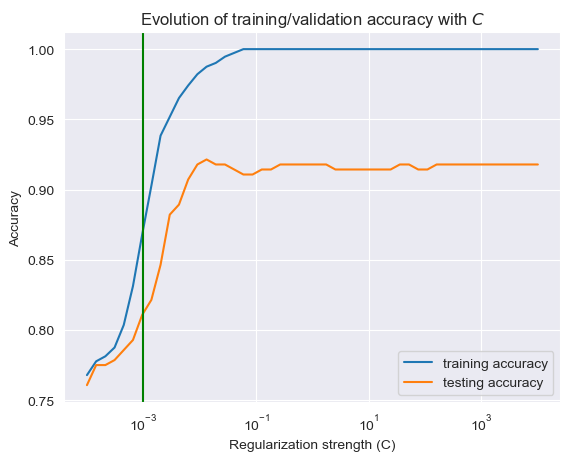

In [18]:
# Plot training/validation accuracy curves
plt.semilogx(cv_results["param_C"], cv_results["mean_train_score"], label='training accuracy')
plt.semilogx(cv_results["param_C"], cv_results["mean_test_score"],  label='testing accuracy')
plt.xlabel('Regularization strength (C)')
plt.ylabel('Accuracy')
plt.axvline(0.001, c='g')

plt.title("Evolution of training/validation accuracy with $C$")
plt.legend()
plt.show()

Do the curves indicate overfitting?

The $C$ parameter in logistic regression controls the inverse of the regularization strength, where a small C indicates a stronger regularization. 
Here we see $C$ is clearly useful in fighting overfitting as test accuracy is capped around 91% and for $C > 10^{-3}$ overfitting starts _(green line on chart)_.

## Test dataset
### Confusion Matrix

In [19]:
# Evaluate best model on testing data
y_pred = grid.predict(X_test)
test_score = accuracy_score(y_test, y_pred)
print("Test score: {:.2f}".format(test_score))

Test score: 0.96


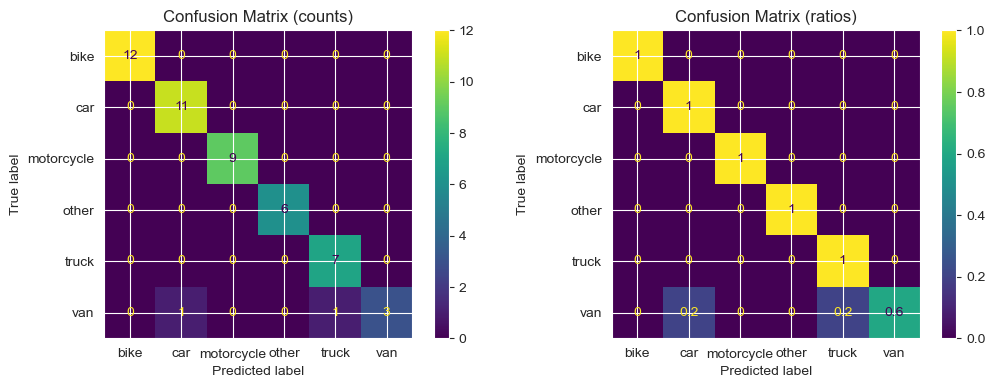

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plots the standard confusion matrix
ax1.set_title("Confusion Matrix (counts)")
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_names, ax=ax1)

# Plots the normalized confusion matrix
ax2.set_title("Confusion Matrix (ratios)")
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, normalize="true", display_labels=class_names, ax=ax2)

plt.show()

We look at misclassified images and their associated probabilities. As in previous section, np.where gets us adresses of misclassified images in test data. We insert in a dataframe the probabilities of each class to plot them as well in the title.

In [21]:
misclassified_indices = np.where(y_test != y_pred)[0]
df_misclassified_proba = pd.DataFrame(data=logreg.predict_proba(X_test[misclassified_indices]), columns=class_names)

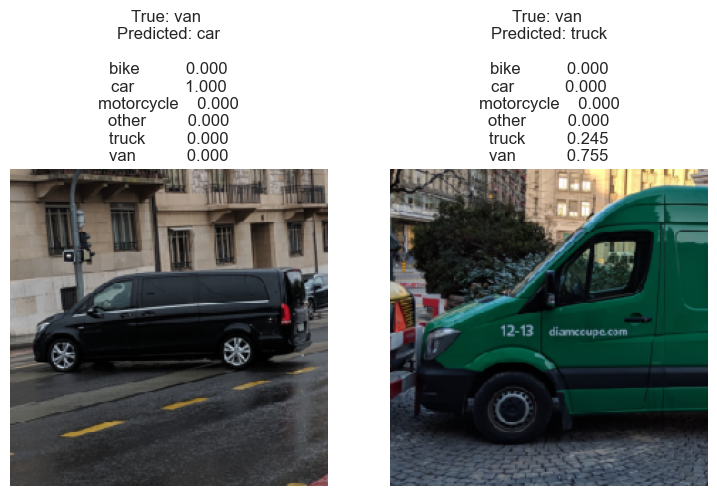

In [22]:
fig, axes = plt.subplots(1, len(misclassified_indices), figsize=(9,9))
axes = axes.flatten()

for index, indice in enumerate(misclassified_indices):
    # Get true label and predicted label for current image
    true_name = class_names[int(test_labels[indice])]
    predicted_name = class_names[int(y_pred[indice])]

    # Create title
    image_title = f"True: {true_name} \nPredicted: {predicted_name}\n\n"
    confidence_title = df_misclassified_proba.iloc[index].map('{:,.3f}'.format).to_string()

    # Plot misclassified image
    axes[index].imshow(test_images[indice])
    axes[index].axis('off')
    axes[index].set_title(image_title + confidence_title )    

plt.show()

### Classification report

In [23]:
# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       0.92      1.00      0.96        11
         2.0       1.00      1.00      1.00         9
         3.0       1.00      1.00      1.00         6
         4.0       0.88      1.00      0.93         7
         5.0       1.00      0.60      0.75         5

    accuracy                           0.96        50
   macro avg       0.97      0.93      0.94        50
weighted avg       0.96      0.96      0.96        50



Category 5, 'van' is the one getting most wrong predictions (from truck and cars)